In [49]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
#EL CSV SE OBTIENE DE GITHUB
url="https://raw.githubusercontent.com/gonzalezgouveia/clases-youtube/main/proyecto-house-price/train.csv"
df=pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#Columnas 
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
#Las columnas que interesan
df[['GrLivArea','SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

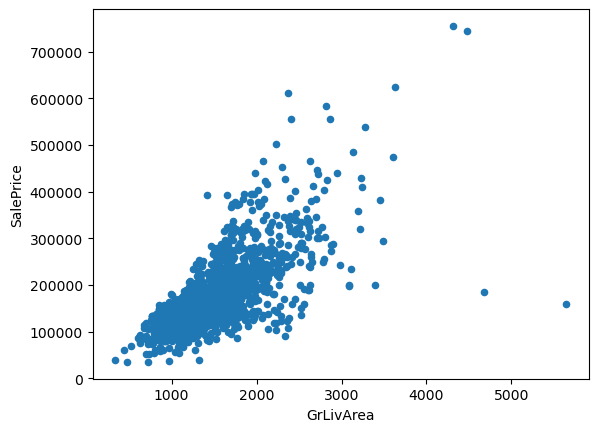

In [41]:
df.plot.scatter(x='GrLivArea',y='SalePrice')

#Muestra la grafica entre --- y el precio de la vivienda

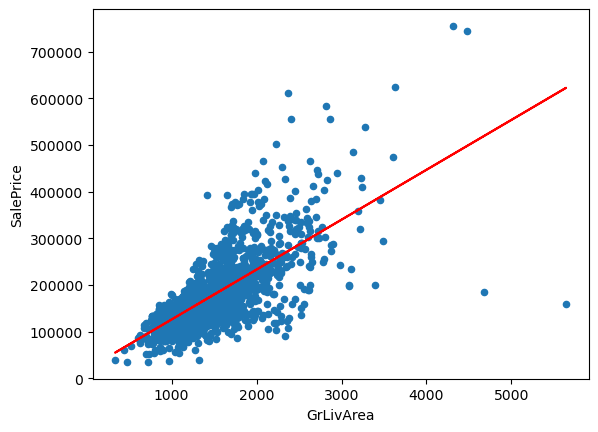

In [23]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['GrLivArea'], y =  df['SalePrice'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  0.7086244776126513
P-value:  4.518033646787136e-223


In [25]:
#Scikit-learn
# División de los datos en train y test
# ==============================================================================
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), #USAMOS RESHAPE(-1,1) porque X y Y son de una dimensión
                                        y.values.reshape(-1,1), #SI NO TUVIERAN DIMENSION 1 NO SE USARÍA RESHAPE
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [27]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_) #Es decir el valor B en la formula y=B+w*x
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), ))) #El valor w en la formula de regresión lineal simple 
print("Coeficiente de determinación R^2:", modelo.score(X, y)) #R cuadradp

Intercept: [19028.84399222]
Coeficiente: [('GrLivArea', 106.91996325794629)]
Coeficiente de determinación R^2: 0.5021435624645302


C:\Users\52553\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [77]:

# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])
#Error cuadratico medio 
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[231371.8910225 ]
 [308140.42464171]
 [179408.78887914]]

El error (rmse) de test es: 51622.07784415953


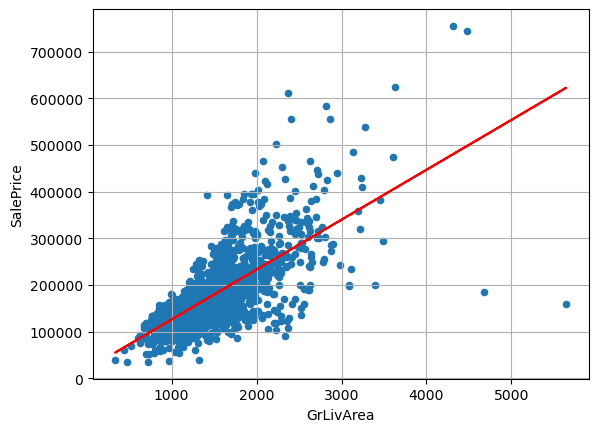

In [62]:
#GRAFICAMOS NUESTRA LINEA QUE MEJOR SE AJUSTA 
Linea =df['GrLivArea']*modelo.coef_.flatten()+modelo.intercept_
df.plot.scatter(x='GrLivArea',y='SalePrice')
plt.plot(X,Linea,color='r')
plt.grid()

#Muestra la grafica entre --- y el precio de la vivienda

Bibliografía: Regresión lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

# Regresion lineal y minimos cuadrados

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

Importamos la libreria y la base de datos que ocuparemos 

In [5]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\52553\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

RM es el número de habitaciones promedio por vivienda 
MEDV El valor medio de las casas  dolares

In [80]:
Y=np.array(boston.target)

In [81]:
#Convertirlo a la formula de minimos cuadrados

X=np.array([np.ones(len(np.array(boston.data[:,5]))),np.array(boston.data[:,5])]).T

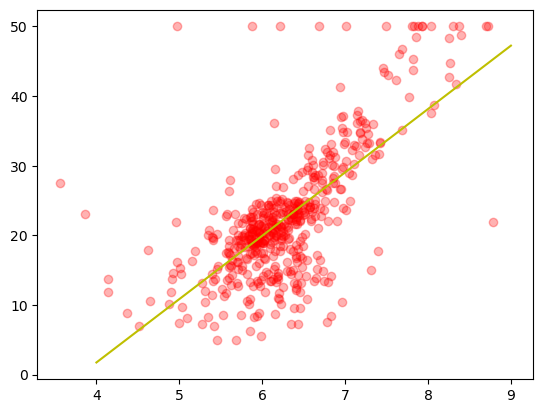

In [84]:
plt.scatter(x=X[:,1],y=Y,alpha=0.3,color='r')

plt.plot([4,9],[B[0]+B[1]*4,B[0]+B[1]*9],c='y')
plt.show()

In [63]:
#PARA MULTIPLICAR MATRICES USAMOS @ Porque usar * es hacerlo de forma escalar 
B=np.linalg.inv(X.T@ X)@X.T@Y

In [85]:
#la pendiente es positiva como se ve en la grafica 
#La ordenada al origen o coeficiente está correcto porque inicia en negativo
B

array([-34.67062078,   9.10210898])